In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Within this document I will be demonstrating simple linear regression. Firstly, we start off with a basic dataset of 10 rows, we shall investigate whether they are positively correlated, negatively correlated or have no correlation. The variables are 'Age' and 'Yearly_Income' and the assumption we are investigating is whether with higher age comes higher income. In this case, age is the independent variable and yearly income the dependent variable. If we slot this into the linear regression formula y = B0 + B1x, yearly income = B0 + (B1*age). B0 represents the intercept which is where the line cuts the y-axis. B1 represents the slope of the line, so for every value of x, how many values does y increase. Y and X represent their respective variables.

![alt text](Linear_Regression_Formula.png "Linear Regression Formula")

In [2]:
#Constructing the dataset
df = pd.DataFrame({'Age': [18,25,57,45,26,64,37,40,24,33], 'Yearly_Income':
                  [15000, 29000,68000,52000,32000,80000,41000,45000,26000,33000]})
df

,Age,Yearly_Income
0,18,15000
1,25,29000
2,57,68000
3,45,52000
4,26,32000
5,64,80000
6,37,41000
7,40,45000
8,24,26000
9,33,33000


Here is a scatter graph of our dataset, what we want to achieve is a line drawn through all the points with the least amount of error. If done correctly and the data is correlated, we can use this line to predict values along the Y and X axis to an accurate degree.

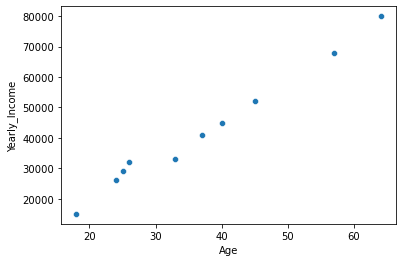

In [3]:
sns.scatterplot(data=df, x='Age', y='Yearly_Income')
plt.show()

Firstly, let's calculate B1. The formula for this is r * (Sy/Sx) which stands for Pearson's correlation coefficient * (standard deviation of y/standard deviation of x) 

This is the formula for Pearson's correlation coefficient:
![alt text](comp_formula.gif "Pearson's R Formula")\
It looks daunting but we will fill this in bit by bit.

In [4]:
#Here we create a column that simply squares each value in the Age column
df['xs_squared'] = df.Age**2
#We then sum all the values of this column. This gives us Sigma x_squared in the formula above.
xs_squared = df['xs_squared'].sum()
print(xs_squared)

#We repeat the above process for Yearly_Income, this gives us Sigma y_squared in the formula above.
df['ys_squared'] = df.Yearly_Income**2
ys_squared = df['ys_squared'].sum()
print(ys_squared)
df

15629
21289000000


,Age,Yearly_Income,xs_squared,ys_squared
0,18,15000,324,225000000
1,25,29000,625,841000000
2,57,68000,3249,4624000000
3,45,52000,2025,2704000000
4,26,32000,676,1024000000
5,64,80000,4096,6400000000
6,37,41000,1369,1681000000
7,40,45000,1600,2025000000
8,24,26000,576,676000000
9,33,33000,1089,1089000000


Next, let's find the values of (Sigma x)squared and (Sigma y)squared.

In [5]:
#These just sum up all the values within the columns, then squares the result.
xsquared = sum(df.Age)**2
print(xsquared)
ysquared = sum(df.Yearly_Income)**2
print(ysquared)

136161
177241000000


Lastly, let's figure out the top line. Sigma X and Sigma Y are just the sums of their corresponding columns

In [6]:
#Sigma X and Sigma Y
age_sum = sum(df.Age)
income_sum = sum(df.Yearly_Income)
print(age_sum)
print(income_sum)

369
421000


Sigma XY is multiplying the first row of Age by the first row of Y, saving that result then continuing so forth down the rows and summing all the resulting values.

In [7]:
age_income = sum(df.Age*df.Yearly_Income)
print(age_income)

18193000


N equals the number of samples, of which we have 10.\
Now we have all the requirements for the formula, let's plug them in.

In [8]:
r = (age_income - ((age_sum*income_sum)/len(df.Age)))/((math.sqrt(xs_squared-(xsquared/len(df.Age))))*(math.sqrt(ys_squared-(ysquared/len(df.Age)))))
print(r)

0.9922852587629405


We can also check using the inbuilt corr() function. This shows an extremely positive correlation between Age and Yearly Income, as Age increases so does Income. 1 is the most positive correlation you can achieve, -1 is the most negative and 0 is no correlation between variables.

In [9]:
print(df['Age'].corr(df['Yearly_Income']))

0.9922852587629404


Now we have r we can return to our formula for B1 which is r * (Sy/Sx).

In [10]:
#Using numpy to calculate that standard deviations of Y and X
Sy = np.std(df.Yearly_Income)
Sx = np.std(df.Age)
print(Sy, Sx)

18880.942773071478 14.187670703818863


Slotting these into our formula gives:

In [11]:
B1 = r*(Sy/Sx)
print(B1)

1320.5325649560339


So our slope is equal to 1320.532. For every 1 value that Age moves along, Yearly Income moves by 1320.532.\
To figure out B0 is easier now we have this value. The formula for B0 is (mean of y) - (B1 * mean of x).

In [12]:
B0 = (np.mean(df.Yearly_Income)) - (B1 * np.mean(df.Age))
print(B0)

-6627.651646877646


Here we can see that the Y intercept is actually a negative number, this is because as Age gets lower so will Yearly Income as they are positively correlated. However, due to the nature of this Y will eventually become negative as X gets closer to zero, in realistic terms we know that a zero year old person cannot earn less than 0 dollars and so this is ignored. 

Now that we have all the values, we can input them into our formula:\
y = -6627.651 + (1320.532 * x)

Our maximum age is 64, but we can now predict values above this value using the formula. However, let's say the retirement age is 65 in this scenario and we're only interested in this populations active working income. Let's also set our lower boundary as 18 due to it being the youngest working age in this population.\
We can calculate the Y values by inputting 64 and 18 into our formula:

In [13]:
#Inputting 64 into our formula
print(-6627.651 + (1320.532*64))
print(-6627.651 + (1320.532*18))

77886.397
17141.924999999996


With these numbers, we can plot a straight line from these two points onto our scatter plot.\


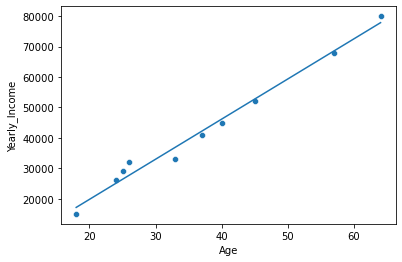

In [14]:
#plotting the scatter plot
sns.scatterplot(data=df, x='Age', y='Yearly_Income')
#plotting the line, [18,64] are the x coordinates and [17141.924, 77886.397] are the Y coordinates
plt.plot([18,64], [17141.924, 77886.397])
plt.show()

This line is our best fitting line to the available data, using it we can predict any value for Yearly Income from whatever age we choose.\
Notice that the Y result we got for 64 (77886.397) is different to the actual value in our data for 64 which was 80000 dollars. Due to the fact that the line is attempting to minimize error amongst all the points, it is very unlikely it will actually be exactly the same as a specific value.

Thank you for reading my work on simple linear regression. This method involves a lot of mathematics primarily in working out Pearson's correlation coefficient, once this has been deduced the rest of the pieces fall into place quite readily. 

Elliot Linsey QMUL 2021